<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; "> Corrélations</h1>
<a href="https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)" >Link to Wikipedia</a>
</div>

### Analyse bivariée

Pour étudier la relation entre deux variables, posez toujours la question sur les types de vos variables, est-ce-que ce sont des variables
**qualitatives** ou **quantitatives**?
<div style="color: RGB(255,114,0)">
<h3>3 cas possibles :</h3>
- 2 variables quantitatives (Coefficient de Pearson ou Corr(Pearson) dans le cas muti-variables, pour confirmer le résultat penser toujours à faire le nuage des points entre les deux variables  .<br/>
- 2 variables qualitatives (chi2/khi2 $\chi^2$) à l'aide d'un tableau contingence).<br/>
- 1 variable quantitatives et 1 qualitative (Analyse en muti-groupes par exemple dans notre cas vérifier s'il existe différence entre sexe et les prix ... ?).<br/>

**Coefficient de corrélation de Pearson**

**Définition**

Le coefficient de corrélation linéaire simple, dit de Bravais-Pearson (ou de Pearson), 
est une normalisation de la covariance par le produit des écarts-type des variables.

$$r=\dfrac{\mathrm{cov}(X,Y)}{\sqrt{V(X)\times V(Y)}}= \dfrac{\mathrm{cov}(X,Y)}{\sigma_x\times \sigma_y}$$

Le coefficient de corrélation est indépendant des unités de mesure des variables, ce qui autorise les
comparaisons. La mesure est normalisée, elle est déffinie entre
$$−1 ≤ r ≤ 1$$ 
Lorsque :
- r = +1, la liaison entre X et Y est linéaire, positive et parfaite c.-à-d. la connaissance de X nous fournit la valeur de Y (et inversement).
- r = −1, la liaison est linéaire et négative.
- Plus il est proche de 1 (en valeur absolue), plus la relation est forte
- r = 0 indique l'absence de corrélation.
- r>0 les deux variables évoluent dans le même sens
- r<0 les deux variable évoluent dans le sens oposé  

**LE TEST D'INDEPENDANCE DU KHI‐DEUX**

Le test d’indépendance du khi2 ($\chi^2$) permet de déterminer si deux variables **qualitatives** sont
indépendantes ou non. Pour cela, nous testons les deux hypothèses suivantes :

- $H_0$ : les deux variables sont indépendantes 
- $H_1$ : les deux variables sont dépendantes 

On rejette $H_0$ alors si la probabilité est inférieure au seuil usuel de 5%

Voici quelques questions supplémentaires pour nous aider à mieux comprendre les ventes enregistrées.

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
- Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?
- Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?
- Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?
- Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math 
from scipy.stats import chi2_contingency,chi2

In [93]:
data=pd.read_csv("data_netoyer")

In [94]:
data['categ']=data['categ'].astype("category") 
data['sex']=data['sex'].astype("category")
data['date']=pd.to_datetime(data['date'])

In [95]:
data.set_index('date',inplace=True)

In [96]:
data['date_day']=data.index.to_period("D")

In [97]:
data['date_mois']=data.index.to_period("M")

In [98]:
# variable age
data['age'] = 2023 - data['birth']

In [99]:
#data.info()

In [100]:
data.head()

,id_prod,price,categ,session_id,client_id,sex,birth,date_day,date_mois,age
date,,,,,,,,,,
2022-01-12 00:40:51.966720,0_1421,19.99,0.0,s_148474,c_6714,f,1968.0,2022-01-12,2022-01,55.0
2021-09-20 06:39:24.010766,0_1421,19.99,0.0,s_92614,c_6714,f,1968.0,2021-09-20,2021-09,55.0
2022-11-10 02:30:41.901616,0_1421,19.99,0.0,s_295343,c_6714,f,1968.0,2022-11-10,2022-11,55.0
2021-12-12 16:25:24.521515,0_1421,19.99,0.0,s_133316,c_6714,f,1968.0,2021-12-12,2021-12,55.0
2021-04-02 08:24:37.335017,0_1421,19.99,0.0,s_14853,c_6714,f,1968.0,2021-04-02,2021-04,55.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 1. Première approche des corrélations sur l'ensemble de nos variables numériques</h2>
</div> 

In [12]:
##on utilise data.corr et le heatmap de seborn

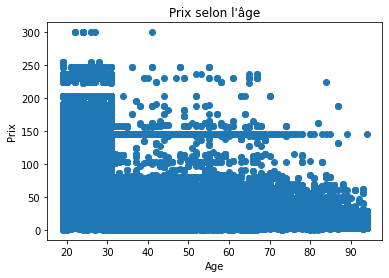

In [109]:
plt.scatter(data['age'], data['price'])
plt.title("Prix selon l'âge")
plt.xlabel('Age')
plt.ylabel('Prix')
plt.show()

In [101]:
data[['price','age']].corr()

,price,age
price,1.000000,-0.209465
age,-0.209465,1.000000


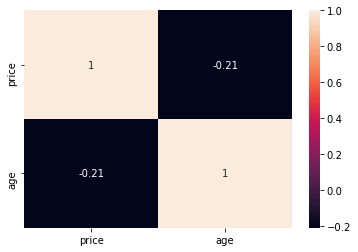

In [102]:
sns.heatmap(data[['price','age']].corr(),annot=True,)
plt.show()

**Il y a pas une corrélation entre âge et price** 

**Ou Coefficient de corrélation de Pearson pour seulement deux variable**

In [103]:
pearson_coef, p_value = stats.pearsonr(data['age'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef)  

The Pearson Correlation Coefficient is -0.20946478110179134


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 2. Analyse de la corrélation entre le sexe des clients et les catégories de produits achetés </h2>
</div> 

In [13]:
##test khi2/chi2

In [86]:
def test_chi2(serie1, serie2):
    
    alpha = 0.03   # le risque  
    
    #H0 : les variables sont indépendantes

    tab_contingence = pd.crosstab(serie1, serie2)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence)
    print('chi2 : {0:.5f},\n p : {0:.5f},\n dof : {0:.5f}'.format(stat_chi2, p, dof))
    print('tableau de contingence : \n', tab_contingence)
    critical = chi2.ppf(1-alpha, dof) 
    print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p,alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [91]:
test_chi2(data['categ'],data['sex'])

tableau de contingence :
 sex         f       m
categ                
0.0    206103  209356
1.0    114899  112270
2.0     17283   19200
chi2 : 147.11907,
 p : 147.11907,
 dof : 147.11907
critital :  7.013115794639961
Variables non indépendantes (H0 rejetée) car p = 1.13109805970906e-32 <= alpha = 0.03


False

**Les catégories de livres sont corrélées à l’âge des clients**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 3. Analyse de la corrélation entre l'âge clients et le montant total des achats </h2>
</div> 

In [14]:
## pour le visual  nuage des points avec plt.scatter ou plt.plot
## et avec un test de stat on utilise: Coefficient de corrélation linéaire de Pearson 

In [117]:
age_prix = data.groupby('age').sum().reset_index()
age_prix = age_prix[['age', 'price']].sort_values(by='age', ascending=False) 
age_prix['price'] = age_prix['price']/1000 # en (K€)

In [118]:
age_prix

,age,price
75,94.0,3.22185
74,93.0,4.01387
73,92.0,2.81545
72,91.0,5.04319
71,90.0,5.25435
...,...,...
4,23.0,165.00798
3,22.0,178.49770
2,21.0,184.17735
1,20.0,178.19578


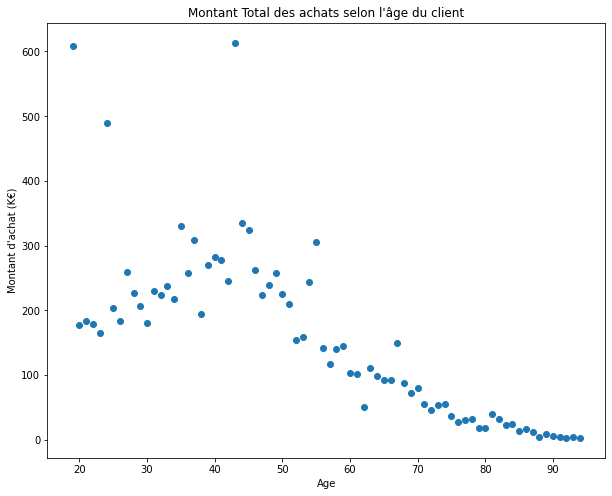

In [158]:
plt.figure(figsize=(10,8))
plt.scatter(age_prix['age'], age_prix['price'])
plt.title("Achat selon l'âge")
plt.xlabel('Age')
plt.ylabel("Montant d'achat (K€)")
plt.title("Montant Total des achats selon l'âge du client")
plt.show()

In [145]:
pearson_coef, p_value = stats.pearsonr(age_prix['age'], age_prix['price'])
print("The Pearson Correlation Coefficient is", pearson_coef)  

The Pearson Correlation Coefficient is -0.7788810457117039


- La valeur absolue du cofficient est très proche de 1 alors une forte correlation
- Le coefficient est négatif alors les deux variable évoluent dans le sens oposé (plus les consommateurs sont agés plus le montant total de leur achat est faible)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 4. Analyse de la corrélation entre l'âge clients et la fréquence d'achat </h2>
</div> 

In [159]:
clients_freq = data.groupby('age').count().reset_index()
clients_freq = clients_freq[['age', 'session_id']]

#Création d'une variable fréquence 
clients_freq['frequence'] = clients_freq['session_id'] / sum(clients_freq['session_id'])

In [160]:
clients_freq.head()

,age,session_id,frequence
0,19.0,15149,0.022307
1,20.0,4371,0.006436
2,21.0,4584,0.006750
3,22.0,4252,0.006261
4,23.0,4413,0.006498


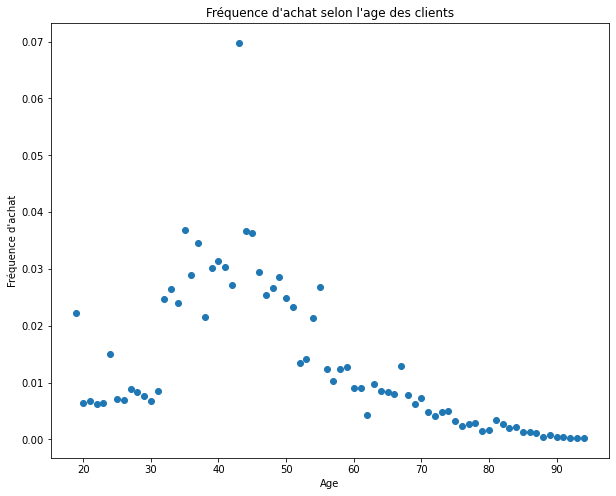

In [162]:
plt.figure(figsize=(10,8))
plt.scatter(clients_freq['age'], clients_freq['frequence'])
plt.title("Achat selon l'âge")
plt.xlabel('Age')
plt.ylabel("Fréquence d'achat")
plt.title("Fréquence d'achat selon l'age des clients")
plt.show()

In [165]:
pearson_coef, p_value = stats.pearsonr(clients_freq['age'], clients_freq['frequence'])
print("The Pearson Correlation Coefficient is", pearson_coef)  

The Pearson Correlation Coefficient is -0.5337344271238335


- **IL y a une relation entre l'age et la frequence** 
- **On remarque à partir du graphique qu'il y a des clusters de clients sur cette corrélation, par exemple entre 19 et 35 ans.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 5. Analyse de la corrélation entre l'âge clients et la taille du panier moyen </h2>
</div> 
 

In [15]:
## pour le visual  nuage des points avec plt.scatter ou plt.plot
## et avec un test de stat on utilise: Coefficient de corrélation linéaire de Pearson 

In [180]:
clients_panier= data.groupby(['age', 'session_id']).count().reset_index()
clients_panier=clients_panier.groupby(['age']).mean().reset_index()
clients_panier = clients_panier[['age', 'id_prod']]
clients_panier=clients_panier.rename(columns={'id_prod':'panier_moyen'})

In [181]:
#clients_panier

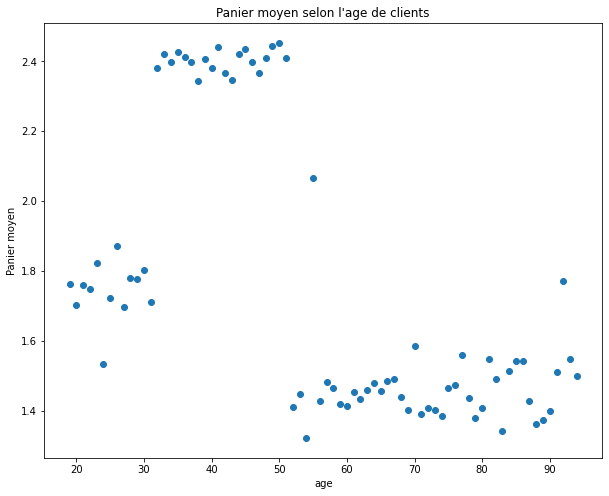

In [184]:
plt.figure(figsize=(10,8))
plt.scatter(clients_panier['age'], clients_panier['panier_moyen'])

plt.xlabel('age')
plt.ylabel('Panier moyen')
plt.title("Panier moyen selon l'age de clients")
plt.show()

In [186]:
# Visualisation selon les clusters d'age (tranche d'âge)

clients_panier31 = clients_panier[clients_panier['age'] < 31]
clients_panier31_50 = clients_panier[(clients_panier['age'] > 31) & (clients_panier['age'] < 50)]
clients_panier50 = clients_panier[clients_panier['age'] > 51]

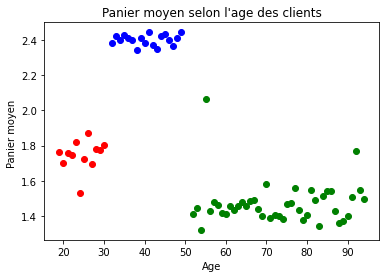

In [189]:
plt.scatter(clients_panier31['age'], clients_panier31['panier_moyen'], color='r')
plt.scatter(clients_panier31_50['age'], clients_panier31_50['panier_moyen'], color='b')
plt.scatter(clients_panier50['age'], clients_panier50['panier_moyen'], color='g')

plt.xlabel('Age')
plt.ylabel('Panier moyen ')
plt.title("Panier moyen selon l'age des clients")
plt.show()

In [190]:
pearson_coef, p_value = stats.pearsonr(clients_panier['age'], clients_panier['panier_moyen'])
print("The Pearson Correlation Coefficient is", pearson_coef)  

The Pearson Correlation Coefficient is -0.5739035320699193


- Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. 
- A partir du graphique on remarque des clusters des clients :
    - Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. 
    - Il existe également un lien sur les individus de 19 à 30 ans et de 30 à 50 ans. 
<div style="color: RGB(255,114,0)">
<h3> Conclusion :</h3> 
    <h4>La linéarité de la corrélation existe mais selon les clusters de clients (tranches d'âges)<h4>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 6. Analyse de la corrélation entre l'âge clients et la catégorie produits </h2>
</div> 

**Pour simplifier l'analyse, il est nécessaire de procéder par un découpage(classe/discrétisation) . Donc très clairement le but est de pouvoir réduire nos individus "âges" par catégories d'âge, de manière à pouvoir interpréter plus facilement lesrésultats.**

**Comment choisir le nombre de classes ou des catégories ? (on peut utiliser la fonction qcut )**

Ou bient l'un de deux formules : 

- Sturges-Huntsberger : $k = 1 + 3.33\times\log(N,base=10)$

- Brooks-Carruthers : $k = 5\times\log(N,base=10)$


In [196]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
h=1 + ((10/3) * math.log10(227))
#Formule de Brooks-Carruthers : 5*log10(N)
b=5 * math.log10(227)
print("Huntsberger = {}\nBrooks-Carruthers={}\n".format(h,b))

Huntsberger = 8.853419523977076
Brooks-Carruthers=11.780129285965613



**On peut prendre soit le min, le max ou la moyenne entre le deux**

In [202]:
age_categ = data.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]

In [203]:
age_categ.head()

,age,categ,session_id
0,19.0,0.0,3418
1,19.0,1.0,5719
2,19.0,2.0,6012
3,20.0,0.0,909
4,20.0,1.0,1678


In [204]:
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()

In [206]:
#age_categ

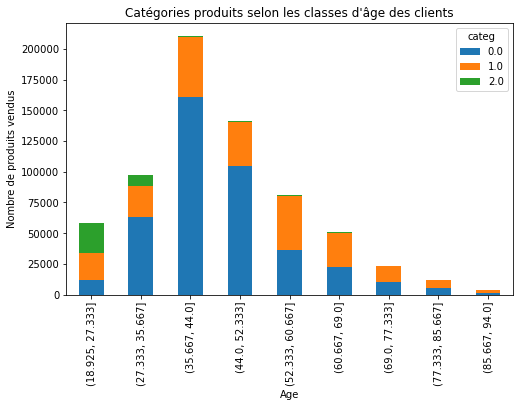

In [214]:
age_categ.pivot_table( values='session_id',index='age',columns='categ').plot(kind='bar',stacked=True,figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Nombre de produits vendus')
plt.title("Catégories produits selon les classes d'âge des clients")
plt.show()

**On remarque qu'on peut avoir un lien entre catégorie et la une tranche d'âges.**
- Un fort achat de la catégorie 0 pour les 35 / 44 ans,
- Parcontre les clients le plus âgée n'opte pas à cette catégorie

## Remarques: 
- Le fait que la variable est regroupé par classe on peut perdre de l'infomation
- Vous pouvez essayer aussi avec 3 classe d'age vu qu'on a remarqué qu'il 3 clusters selon l'âge.

In [ ]:
## Conclusions:
A vous de jouer 